## Двухслойная нейронная сеть на numpy

In [1]:
'''
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения

class Simple_Neural_Network:
    
    def __init__(self):
            pass

    # преобразование массива в бинарный вид результатов
    def to_one_hot(slef, Y):
        n_col = np.amax(Y) + 1
        binarized = np.zeros((len(Y), n_col))
        for i in range(len(Y)):
            binarized[i, Y[i]] = 1.
        return binarized

    # преобразование массива в необходимый вид
    def from_one_hot(self, Y):
        arr = np.zeros((len(Y), 1))
        for i in range(len(Y)):
            l = layer2[i]
            for j in range(len(l)):
                if(l[j] == 1):
                    arr[i] = j+1
        return arr

    # сигмоида и ее производная
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def sigmoid_deriv(self, x):
        return self.sigmoid(x)*(1 - self.sigmoid(x))

    # нормализация массива
    def normalize(self, X, axis=-1, order=2):
        l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
        l2[l2 == 0] = 1
        return X / np.expand_dims(l2, axis)
    
    # Поиск наилучших параметров для построения модели
    def searh_best_params(self, X, y, iterations, learnin_rate, weight1, weight2):
        if (type(learnin_rate) != list) or (type(iterations) != list):
            print('learnin_rate or iterations is not list')
        else:
            learnin_rate = learnin_rate
            iterations = iterations
        dict_errors = {}
        for step_learning in learning_list:
            for step_iter in iterations_list:
                # процесс обучения
                X_new = X
                y_new = y
                errors = []
                w0 = weight1
                w1 = weight2
                for i in range(step_iter): #100,000

                    # прямое распространение(feed forward)
                    layer0 = X_new
                    layer1 = self.sigmoid(np.dot(layer0, w0))
                    layer2 = self.sigmoid(np.dot(layer1, w1))

                    # обратное распространение(back propagation) с использованием градиентного спуска
                    layer2_error = y_new - layer2
                    layer2_delta = layer2_error * self.sigmoid_deriv(layer2)

                    layer1_error = layer2_delta.dot(w1.T)
                    layer1_delta = layer1_error * self.sigmoid_deriv(layer1)

                    w1 += layer1.T.dot(layer2_delta) * step_learning
                    w0 += layer0.T.dot(layer1_delta) * step_learning

                    error = np.mean(np.abs(layer2_error))
                    errors.append(error)
                    dict_errors[f'stplrn={step_learning}_stpitr={step_iter}'] = errors
                    accuracy = (1 - error) * 100
                    dict_errors[f'accurasy_in_lrn={step_learning}_itr={step_iter}'] = accuracy
        
        return dict_errors
    
    
    def find_solution(self, X, y, iterations, learnin_rate, weight1, weight2):
        errors = []
        w0 = weight1
        w1 = weight2
        # процесс обучения
        for i in range(iterations):

            # прямое распространение(feed forward)
            layer0 = X
            layer1 = self.sigmoid(np.dot(layer0, w0))
            layer2 = self.sigmoid(np.dot(layer1, w1))

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer2_error = y - layer2
            layer2_delta = layer2_error * self.sigmoid_deriv(layer2)

            layer1_error = layer2_delta.dot(w1.T)
            layer1_delta = layer1_error * self.sigmoid_deriv(layer1)

            w1 += layer1.T.dot(layer2_delta) * learnin_rate
            w0 += layer0.T.dot(layer1_delta) * learnin_rate

            error = np.mean(np.abs(layer2_error))
            errors.append(error)
            accuracy = (1 - error) * 100
        
        return errors, accuracy

In [3]:
S = Simple_Neural_Network()

In [4]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv('D:Учеба/Neural_Network/Task1/Iris.csv')
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

In [5]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

In [6]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = S.normalize(x.values)

In [7]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = S.to_one_hot(y)

In [8]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [9]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w00 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w11 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

In [10]:
learning_list = [0.001, 0.002, 0.003]
iterations_list = [100, 1000, 10000]

In [11]:
errors_dict = S.searh_best_params(X_train, y_train, iterations_list, learning_list, w00, w11)

In [12]:
for k in errors_dict.keys():
    if 'accurasy_in_' in k:
        print(f'{k} = {round(errors_dict[k], 2)}%')

accurasy_in_lrn=0.001_itr=100 = 52.32%
accurasy_in_lrn=0.001_itr=1000 = 56.51%
accurasy_in_lrn=0.001_itr=10000 = 78.61%
accurasy_in_lrn=0.002_itr=100 = 78.69%
accurasy_in_lrn=0.002_itr=1000 = 79.51%
accurasy_in_lrn=0.002_itr=10000 = 87.46%
accurasy_in_lrn=0.003_itr=100 = 87.6%
accurasy_in_lrn=0.003_itr=1000 = 88.78%
accurasy_in_lrn=0.003_itr=10000 = 92.83%


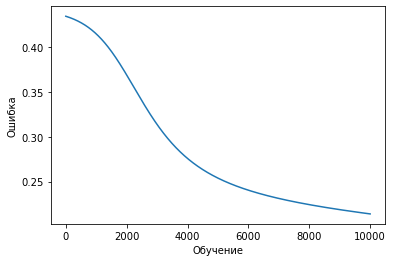

Точность нейронной сети 78.61%


In [13]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors_dict['stplrn=0.001_stpitr=10000'])
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(errors_dict['accurasy_in_lrn=0.001_itr=10000'],2)) + "%")

In [14]:
err, acc = S.find_solution(X_train, y_train, 10000, 0.001, w00, w11)

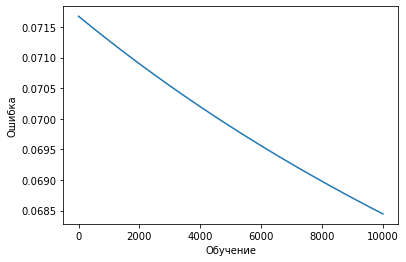

Точность нейронной сети 93.16%


In [15]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(err)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(acc,2)) + "%")

Создал функцию для поиска наилудчших параметров (searh_best_params), при этом, сохраняя все списки ошибок и расчеты точности в словарь (dict_errors)
Далее, вызываю обычную функцию обучения (find_solution) передаю в неё подобраные параметры и получаю абсолютно другой результат...
Почему, не понятно?
Например наидчший параметр по результатам (searh_best_params) был 10000 итераций и скорость обучения 0.001 точность модель 78%
Передаю параметры 10000 и 0.001 в функцию (find_solution) прямого обучения получаю точность модели 93%

На точность модели влияет количество итераций и скорость обучения.
Чем ниже скорость обучения (learning_rate -> 1) тем ниже точность
Увеличение количества итераций (Iterations -> inf) также влияет на точность, но при этом, не должно быть достаточно большим, чтобы не перегружать память и увиличивать время.